In [16]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train /255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [4]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

In [5]:
import time 

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                validation_data = (X_test, y_test))
print("fit time : ", time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 105s 55ms/step - loss: 0.2383 - accuracy: 0.9244 - val_loss: 0.0392 - val_accuracy: 0.9888
Epoch 2/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.0273 - val_accuracy: 0.9918
Epoch 3/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0297 - accuracy: 0.9900 - val_loss: 0.0258 - val_accuracy: 0.9918
Epoch 4/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.0360 - val_accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0308 - val_accuracy: 0.9914
fit time :  482.1094081401825


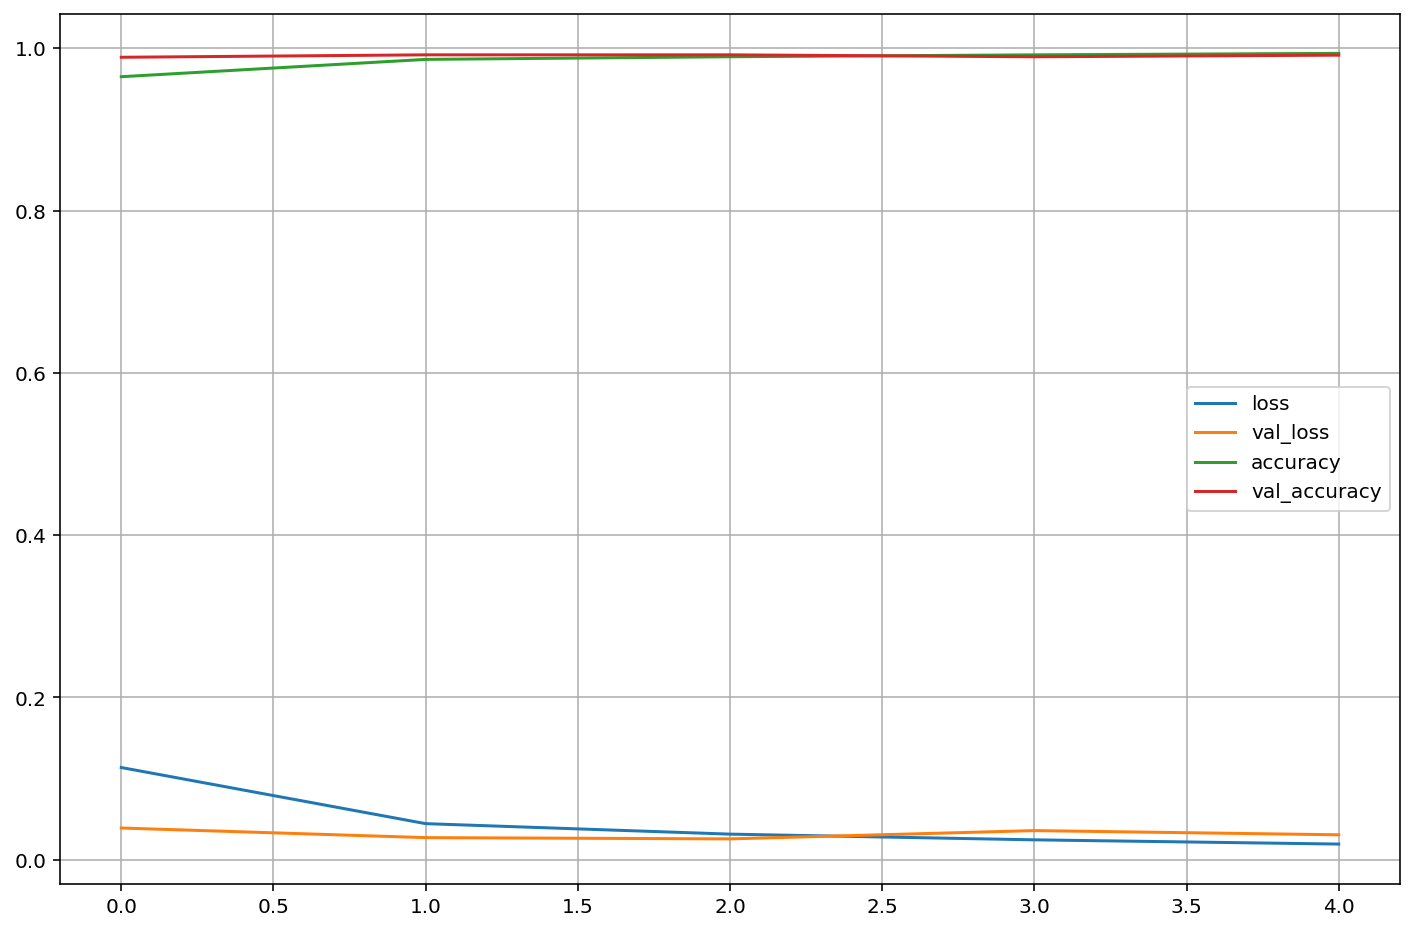

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [8]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 4s 14ms/step - loss: 0.0308 - accuracy: 0.9914
Test loss : 0.030810941010713577
Test accuracy : 0.9914000034332275


In [9]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [10]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
    len(wrong_result)

In [11]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[2380,
 2896,
 4620,
 2654,
 4761,
 9664,
 1878,
 1600,
 4078,
 2659,
 1600,
 4176,
 938,
 4007,
 2597,
 947]

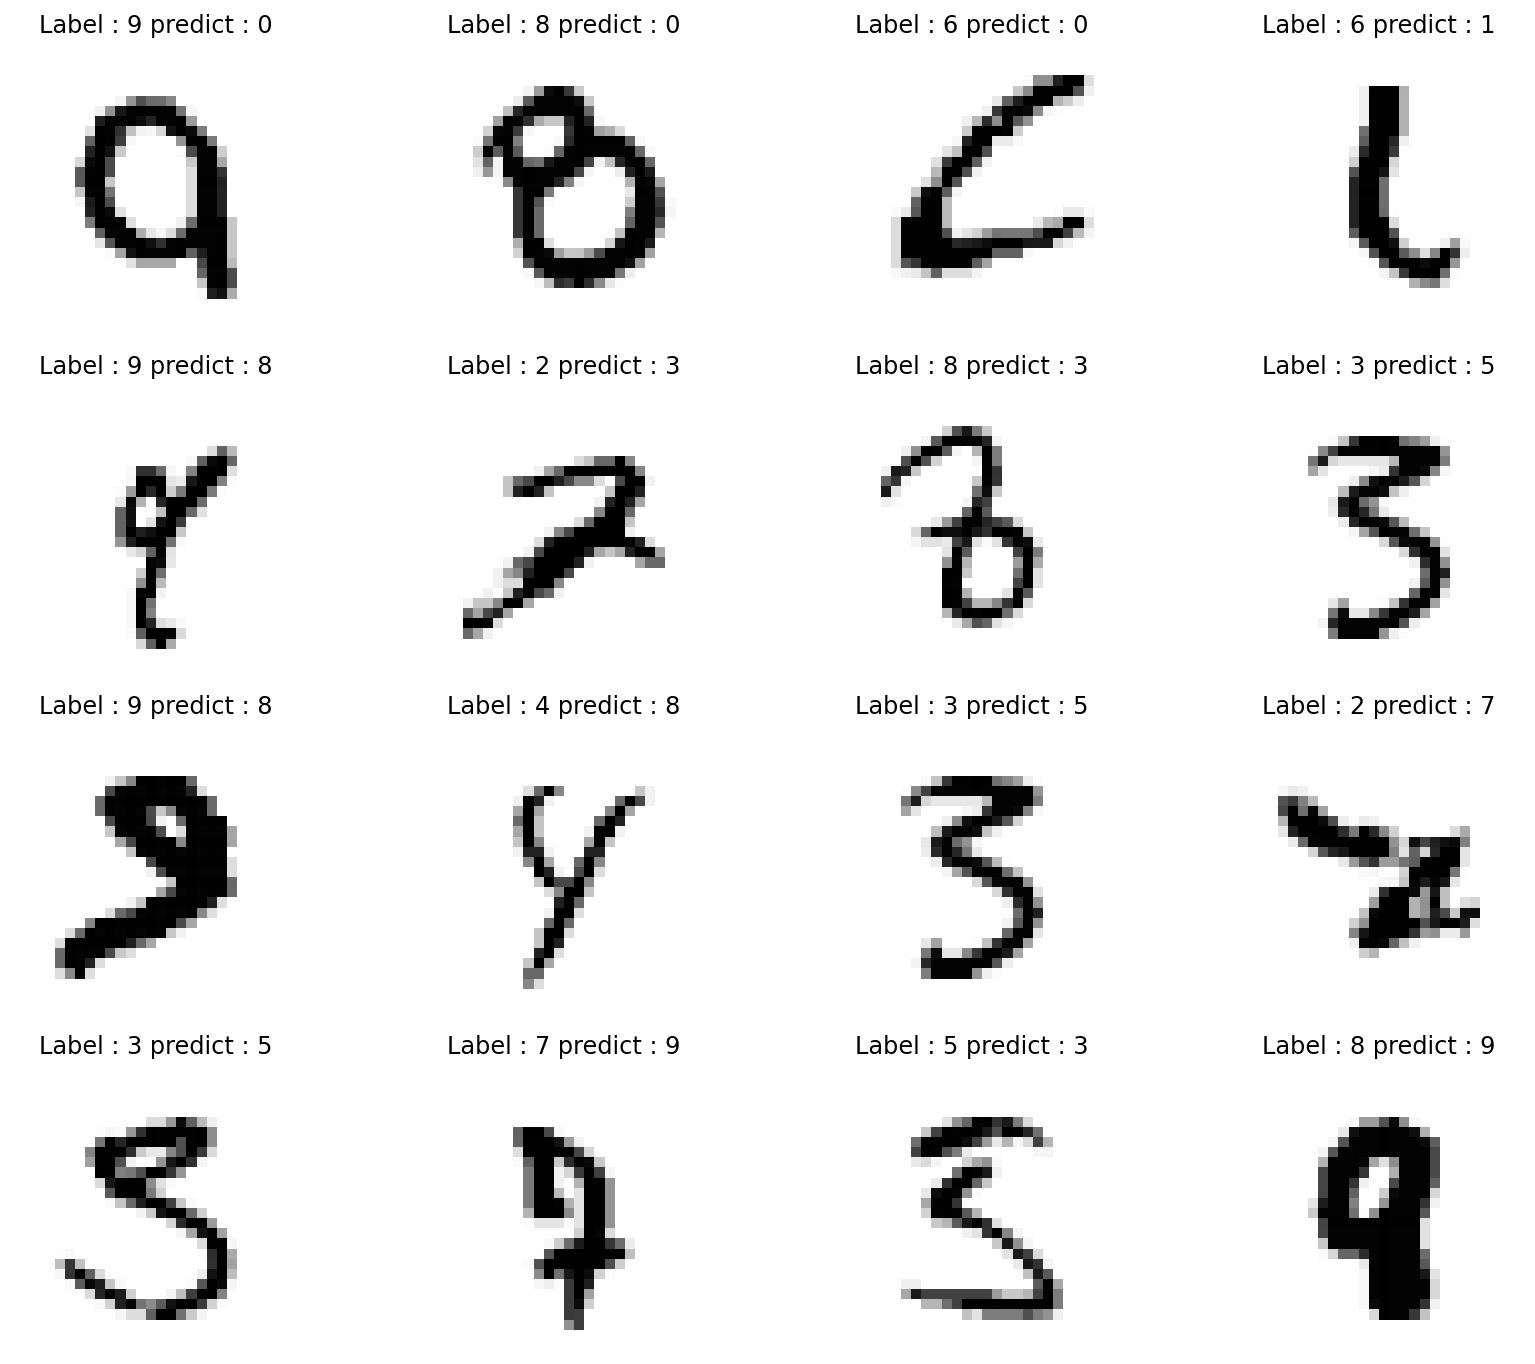

In [12]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' predict : ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

In [13]:
model.save('MNIST_CNN_model.h5')

In [15]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train /255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [17]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 5s 15ms/step - loss: 0.0308 - accuracy: 0.9914 0s - loss: 0.0311 - accu
Test loss : 0.030810941010713577
Test accuracy : 0.9914000034332275
